In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [2]:
france_df = pd.read_csv(r"C:\Users\ANUSHA\Documents\Course_10_Capstone Project\Data_Files\France.csv")
france_df

,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,...,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,6165738,31986651,Bernard,42120.0,100.0,1.0,1.0,Thoiry,Rhône-Alpes,1710,...,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
1,13908935,82489826,Enice,42559.0,100.0,1.0,1.0,Gaillard,Auvergne Rhône-Alpes,74240,...,560.0,28.0,1,6,2,30,1,80.0,moderate,1.00
2,7713011,32492446,Vincent,42127.0,100.0,7.0,7.0,Paris,Île-de-France,75018,...,100.0,30.0,1,5,4,365,37,85.0,strict,1.84
3,3335054,2726446,Pascale,41084.0,NaN,1.0,1.0,Paris,Île-de-France,75018,...,150.0,15.0,1,0,3,1125,1,100.0,moderate,0.03
4,10066518,30432969,Lea,42095.0,95.0,2.0,2.0,Paris,Île-de-France,75018,...,NaN,15.0,1,0,2,1125,13,97.0,moderate,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56557,2610162,13368008,Réda,41719.0,60.0,1.0,1.0,Paris,Île-de-France,75007,...,250.0,10.0,1,0,2,91,14,85.0,moderate,1.06
56558,13760682,8684576,H. M.,41524.0,83.0,2.0,2.0,Paris,Île-de-France,75007,...,NaN,100.0,4,50,2,15,4,100.0,strict,0.56
56559,9173969,47740911,Host,42306.0,NaN,1.0,1.0,Paris,Île-de-France,75007,...,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
56560,13754942,35042224,Arnaud,42160.0,NaN,1.0,1.0,Paris,Île-de-France,75007,...,500.0,36.0,1,0,4,500,3,100.0,strict,0.34


In [3]:
# Convert Price column to numeric, force errors to NaN
france_df['Price'] = pd.to_numeric(france_df['Price'], errors='coerce')

# Now check for NaNs
print(france_df['Price'].isnull().sum())

57


In [4]:
france_df['Weekly Price'].isnull().sum()

40234

In [5]:
france_df['Monthly Price'].isnull().sum()

44214

In [6]:
# Fill Weekly Price using 10% discount from daily price
france_df['Weekly Price'] = france_df['Weekly Price'].fillna(france_df['Price'] * 7 * 0.9)

# Fill Monthly Price using 20% discount from daily price
france_df['Monthly Price'] = france_df['Monthly Price'].fillna(france_df['Price'] * 30 * 0.8)

In [7]:
# Step 1: Fill Price using Monthly Price (reverse of 20% discount)
france_df.loc[france_df['Price'].isna() & france_df['Monthly Price'].notna(), 'Price'] = (
    france_df['Monthly Price'] / 30 / 0.8
)

In [8]:
france_df.loc[france_df['Price'].isna() & france_df['Weekly Price'].notna(), 'Price'] = (
    france_df['Weekly Price'] / 7 / 0.9)

In [9]:
france_df['Weekly Price'].isnull().sum()

54

In [10]:
france_df['Monthly Price'].isnull().sum()

46

In [11]:
# Median price by Room Type
room_medians = france_df.groupby('Room Type')['Price'].median()

# Fill missing prices
france_df['Price'] = france_df['Price'].fillna(france_df['Room Type'].map(room_medians))


In [12]:

# Now check for NaNs
print(france_df['Price'].isnull().sum())

0


In [13]:
# Fill Weekly Price using 10% discount from daily price
france_df['Weekly Price'] = france_df['Weekly Price'].fillna(france_df['Price'] * 7 * 0.9)

# Fill Monthly Price using 20% discount from daily price
france_df['Monthly Price'] = france_df['Monthly Price'].fillna(france_df['Price'] * 30 * 0.8)

In [14]:
france_df['Price'].isnull().sum()

0

In [15]:
france_df['Weekly Price'].isnull().sum()

0

In [16]:
france_df['Monthly Price'].isnull().sum()

0

In [17]:
france_df[france_df['Price']==0]

,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,...,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
56559,9173969,47740911,Host,42306.0,NaN,1.0,1.0,Paris,Île-de-France,75007,...,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN


In [18]:
# Host Name - misisng values rows are dropped - as those rows (Host Since/Host Listing Count/ Host Total Listings Count) had many values missing -
france_df = france_df[france_df['Host Name'].notna() & (france_df['Host Name'].str.strip() != '')]


In [19]:
# regular expression
import re

def keep_letters_and_accents(text):
    text = str(text)
    text = re.sub(r'\(.*?\)', '', text)                # Remove text in parentheses
    text = re.sub(r'[^A-Za-zÀ-ÿ\s]', '', text)         # Keep only A–Z, a–z, accented letters, and spaces
    return text.strip()

france_df['Host Name'] = france_df['Host Name'].apply(keep_letters_and_accents)


In [20]:

france_df['Host Name'] = france_df['Host Name'].replace("","Unknown")
france_df['Host Name'] = france_df['Host Name'].replace("HIDDENHIDDEN","Unknown")

In [21]:
france_df['Host Since'] = pd.to_numeric(france_df['Host Since'], errors='coerce')

france_df['Host Since'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(france_df['Host Since'], unit='D')
# Current date
current_date = pd.to_datetime("today")

# Experience in years, rounded to 1 decimal
france_df['Host Experience'] = ((current_date - france_df['Host Since']).dt.days / 365).round(1)

In [22]:
france_df['Host Response Rate'] = france_df['Host Response Rate'].interpolate(method='linear').round(1)

In [23]:
# Filling missing values of Host Response Rate,Security Deposit, Cleaning Fee with '0'
zero_rows = ['Security Deposit','Cleaning Fee']
for col in france_df:
    france_df[col] = france_df[col].fillna(0)


In [24]:
# Replacing missing values of Zipcode, State, City with "Unknown"
unknown_rows = ['Zipcode','City','State']
for i in unknown_rows:
    france_df[i] = france_df[i].fillna("Unknown")


In [25]:
# Step 1: Define known state variants and map them to a standard name
state_mapping = {
    # Ile-de-France variations
    'Île-de-France': 'Ile-de-France',
    'Ile-de-France': 'Ile-de-France',
    'île de France': 'Ile-de-France',
    'ile de France': 'Ile-de-France',
    'Ile de France': 'Ile-de-France',
    'IDF': 'Ile-de-France',
    'IdF': 'Ile-de-France',
    'Isle-De-France': 'Ile-de-France',
    'Isla de Francia': 'Ile-de-France',
    'Île de France': 'Ile-de-France',
    'Ãle-de-France': 'Ile-de-France',

    # Rhône-Alpes variations
    'Rhone-Alpes': 'Rhône-Alpes',
    'Rhône-Alpes': 'Rhône-Alpes',
    'RA': 'Rhône-Alpes',
    'Auvergne-Rhône-Alpes': 'Rhône-Alpes',
    'Auvergne Rhône-Alpes': 'Rhône-Alpes',

    # Other known values
    'Burgundy': 'Burgundy',
    'Centre': 'Centre',
    'Paris': 'Paris',
    'paris': 'Paris',
    'Montmartre': 'Paris',
    'Pigalle': 'Paris',
    'le marais': 'Paris',
    'Heart of Montparnasse': 'Paris',
}

# Only update State values for rows where Country == 'France'
france_df.loc[france_df['Country'] == 'France', 'State'] = \
    france_df.loc[france_df['Country'] == 'France', 'State'].map(state_mapping).fillna('Unknown')


In [26]:
# Step 1: Compute medians for each Room Type
room_medians = france_df.groupby('Room Type')[['Beds', 'Bathrooms', 'Bedrooms']].median()

# Step 2: Map medians back to the original dataframe for each column
for col in ['Beds', 'Bathrooms', 'Bedrooms']:
    france_df[col] = france_df[col].fillna(france_df['Room Type'].map(room_medians[col]))


In [27]:
france_df['Amenities'] =  france_df['Amenities'].replace(0," ") 

In [28]:
france_df['Amenities'] = france_df['Amenities'].str.replace(
    'translation missing: en.hosting_amenity_50', '', regex=False
)

In [29]:
france_df['Amenities'] = france_df['Amenities'].str.replace(
    'translation missing: en.hosting_amenity_49', '', regex=False
)

In [30]:
(france_df['Amenities'].str.strip() == '').sum()


442

In [31]:
# Count number of commas and add 1 to get number of amenities
france_df['Amenities Count'] = france_df['Amenities'].str.count(',') + 1

# If the value was originally empty, set count to 0
france_df.loc[france_df['Amenities'].str.strip() == '', 'Amenities Count'] = 0

In [32]:
france_df['Amenities'] = france_df['Amenities'].replace(" ",'Unknown')


In [33]:
# Step 1: Calculate the mean Review Scores Rating for each Room Type
room_type_means = france_df.groupby('Room Type')['Review Scores Rating'].mean()

# Step 2: Map those means to the dataframe
france_df['RoomType_Mean'] = france_df['Room Type'].map(room_type_means)

# Step 3: Fill missing values using the mapped means
france_df['Review Scores Rating'].fillna(france_df['RoomType_Mean'], inplace=True)

# Optional: Drop the temporary column
france_df.drop(columns='RoomType_Mean', inplace=True)

<Axes: xlabel='Reviews per Month'>

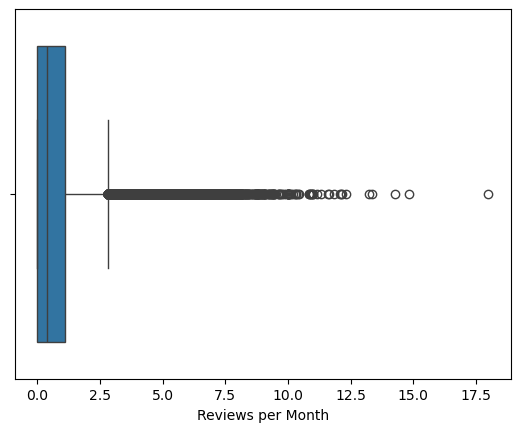

In [34]:
import seaborn as sns
sns.boxplot(x = 'Reviews per Month',data = france_df)

In [35]:
# Step 1: Filter data to exclude outliers (0 to 5 only)
filtered_df = france_df[(france_df['Reviews per Month'] >= 0) & (france_df['Reviews per Month'] <= 5)]

# Step 2: Compute median by room type from filtered data
group_means = filtered_df.groupby('Room Type')['Reviews per Month'].mean()

# Step 3: Fill missing using mapped medians
france_df['Reviews per Month'] = france_df['Reviews per Month'].fillna(france_df['Room Type'].map(group_means))


In [36]:
france_df.to_csv("France_Preprocessed.csv", index=False, encoding='utf-8-sig')


In [37]:
france_df[france_df['Host ID']==5241818]

,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,...,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month,Host Experience,Amenities Count
20545,7261147,5241818,Édith,2013-02-26,100.0,1.0,1.0,Paris,Ile-de-France,75011,...,1,0,2,1125,2,100.0,flexible,0.12,12.4,6


In [38]:
germany_df = pd.read_csv(r"Germany_Preprocessed.csv")

In [39]:
common_cols = france_df.columns.intersection(germany_df.columns)
common_cols

Index(['ID', 'Host ID', 'Host Name', 'Host Since', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count', 'City', 'State',
       'Zipcode', 'Country', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Reviews per Month', 'Host Experience', 'Amenities Count'],
      dtype='object')

In [40]:
combined_df = pd.concat([france_df[common_cols],germany_df[common_cols]],ignore_index = True,axis = 0)
combined_df.shape

(57155, 34)

combined_df.to_csv("AirBNB_Dataset_final.csv",index = False,encoding='utf-8-sig')

In [41]:
#france_df.to_csv("France_Preprocessed.csv", index=False, encoding='utf-8-sig')


In [42]:
combined_df.columns

Index(['ID', 'Host ID', 'Host Name', 'Host Since', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count', 'City', 'State',
       'Zipcode', 'Country', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Reviews per Month', 'Host Experience', 'Amenities Count'],
      dtype='object')

In [43]:
combined_df['Amenities'] = combined_df['Amenities'].str.upper()

In [44]:
# Step 1: Convert the string values into individual columns
amenities_dummies = combined_df['Amenities'].str.get_dummies(sep=',')

# Step 2: Remove leading/trailing spaces in column names
amenities_dummies.columns = amenities_dummies.columns.str.strip()

# Step 3: Convert 1/0 to True/False if preferred
amenities_dummies = amenities_dummies.astype(bool)

# Step 4: Join back to the original DataFrame (optional)
combined_df = combined_df.join(amenities_dummies)


In [45]:
# 1. INTERNET
combined_df['INTERNET'] = combined_df[['INTERNET', 'WIRELESS INTERNET']].any(axis=1).astype(int)

# 2. PETS_FRIENDLY
pet_cols = ['PETS ALLOWED', 'DOG(S)', 'CAT(S)', 'OTHER PET(S)', 'PETS LIVE ON THIS PROPERTY']
combined_df['PETS_FRIENDLY'] = combined_df[pet_cols].any(axis=1).astype(int)
combined_df.drop(columns=pet_cols, inplace=True)

# 3. FAMILY_FRIENDLY
family_cols = ['FAMILY/KID FRIENDLY', 'CHANGING TABLE', 'CHILDREN’S BOOKS AND TOYS', 
               'CHILDREN’S DINNERWARE', 'PACK ’N PLAY/TRAVEL CRIB', 'HIGH CHAIR', 'BABY BATH', 
               'BABY MONITOR', 'TABLE CORNER GUARDS']
combined_df['FAMILY_FRIENDLY'] = combined_df[family_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in family_cols if col in combined_df.columns], inplace=True)

# 4. PARKING_AVAILABLE
parking_cols = ['FREE PARKING ON PREMISES', 'FREE PARKING ON STREET', 'PAID PARKING OFF PREMISES']
combined_df['PARKING_AVAILABLE'] = combined_df[parking_cols].any(axis=1).astype(int)
combined_df.drop(columns=parking_cols, inplace=True)

# 5. SECURE_ENTRY
secure_entry_cols = ['24-HOUR CHECK-IN', 'SMARTLOCK', 'KEYPAD', 'LOCKBOX', 'DOORMAN', 'DOORMAN ENTRY']
combined_df['SECURE_ENTRY'] = combined_df[secure_entry_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in secure_entry_cols if col in combined_df.columns], inplace=True)

# 6. LAUNDRY_AVAILABLE
laundry_cols = ['WASHER', 'DRYER', 'WASHER / DRYER']
combined_df['LAUNDRY_AVAILABLE'] = combined_df[laundry_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in laundry_cols if col in combined_df.columns], inplace=True)

# 7. FIRE_SAFETY_EQUIPPED
fire_cols = ['SMOKE DETECTOR', 'CARBON MONOXIDE DETECTOR', 'FIRE EXTINGUISHER', 'FIRST AID KIT']
combined_df['FIRE_SAFETY_EQUIPPED'] = combined_df[fire_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in fire_cols if col in combined_df.columns], inplace=True)

# 8. ACCESSIBLE
accessible_cols = ['WHEELCHAIR ACCESSIBLE', 'WIDE DOORWAY', 'WIDE HALLWAY CLEARANCE', 
                   'WIDE CLEARANCE TO SHOWER AND TOILET', 'WIDE CLEARANCE TO BED']
combined_df['ACCESSIBLE'] = combined_df[accessible_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in accessible_cols if col in combined_df.columns], inplace=True)

# 9. TEMPERATURE_CONTROL
temp_cols = ['AIR CONDITIONING', 'HEATING', 'HOT WATER']
combined_df['TEMPERATURE_CONTROL'] = combined_df[temp_cols].any(axis=1).astype(int)
combined_df.drop(columns=temp_cols, inplace=True)

# 10. KITCHEN_AVAILABLE
kitchen_cols = ['KITCHEN', 'STOVE', 'OVEN', 'COFFEE MAKER', 'REFRIGERATOR', 'COOKING BASICS', 
                'DISHES AND SILVERWARE']
combined_df['KITCHEN_AVAILABLE'] = combined_df[kitchen_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in kitchen_cols if col in combined_df.columns], inplace=True)

# 11. TV_AVAILABLE
tv_cols = ['TV', 'CABLE TV', 'GAME CONSOLE']
combined_df['TV_AVAILABLE'] = combined_df[tv_cols].any(axis=1).astype(int)
combined_df.drop(columns=[col for col in tv_cols if col in combined_df.columns], inplace=True)



In [46]:
combined_df.columns

Index(['ID', 'Host ID', 'Host Name', 'Host Since', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count', 'City', 'State',
       'Zipcode', 'Country', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Reviews per Month', 'Host Experience', 'Amenities Count',
       'ACCESSIBLE-HEIGHT BED', 'BABYSITTER RECOMMENDATIONS', 'BATHTUB',
       'BED LINENS', 'BREAKFAST', 'BUZZER/WIRELESS INTERCOM', 'CRIB',
       'ELEVATOR IN BUILDING', 'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS',
       'FIREPLACE GUARDS', 'GYM', 'HAIR DRYER', 'HANGERS', 'HOT TUB',
       'INDOOR FIREPLACE', 'INTERNET', 'IRON', 'LAPTOP FRIENDLY WORKSPACE',
       'LOCK ON BEDROOM DOOR', 'LUGGAGE DRO

In [47]:
combined_df.shape

(57155, 81)

In [48]:
combined_df.to_csv('AIRBNB.csv',index = False,encoding='utf-8-sig')